In [1]:
import cv2

In [2]:
#conda install -c conda-forge opencv

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [6]:
car1 = mpimg.imread("car1.jpeg")

In [7]:
car1.shape

(168, 300, 3)

In [5]:
type(car1)

numpy.ndarray

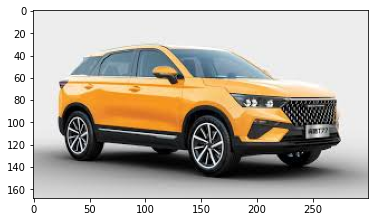

In [4]:
plt.imshow(car1)

In [8]:
car1_cv2 = cv2.imread("car1.jpeg")

In [8]:
cv2.imshow("image", car1_cv2)

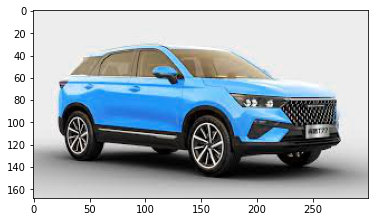

In [9]:
plt.imshow(car1_cv2)

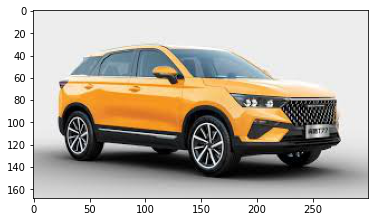

In [10]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

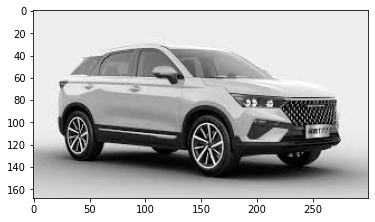

In [11]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [12]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [13]:
car1_cv2_BGR_GRAY.min()

0

In [14]:
car1_cv2_BGR_GRAY.max()

255

In [15]:
# saving the image
cv2.imwrite("car_grayscale.jpeg",car1_cv2_BGR_GRAY )

True

# understanding composition of colored image

In [26]:
def visualize_RGB_channels(imgArray=None, fig_size=(10,7)):
    # spliting the RGB component
    B, G, R=cv2.split(imgArray)
    # zero matrix
    Z=np.zeros(B.shape, dtype=B.dtype)
    # init subplots
    fig, ax=plt.subplots(2,2, figsize=fig_size)
    print(ax.shape)
    [axi.set_axis_off() for axi in ax.ravel()]
    ax[0,0].set_title("original image")
    ax[0,0].imshow(cv2.merge((R,G,B)))
    
    ax[0,1].set_title("Red Image")
    ax[0,1].imshow(cv2.merge((R, Z,Z)))
    
    ax[1,0].set_title("Green Image")
    ax[1,0].imshow(cv2.merge((Z, G,Z)))
    
    ax[1,1].set_title("Blue Image")
    ax[1,1].imshow(cv2.merge((Z,Z,B)))

(2, 2)


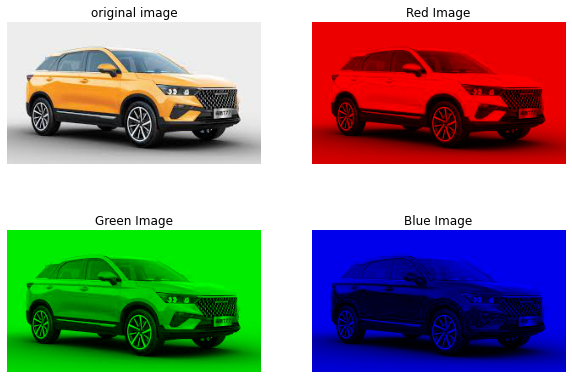

In [27]:
visualize_RGB_channels(imgArray=car1_cv2)

In [28]:
random_colored_image=np.random.randint(0,255,(6,6,3))
random_colored_image.shape

(6, 6, 3)

(2, 2)


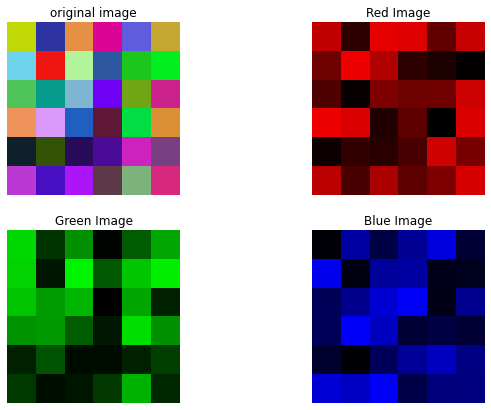

In [29]:
visualize_RGB_channels(random_colored_image)

In [31]:
random_colored_image[0,0,:]

array([  6, 217, 192])

In [32]:
random_colored_image[-1,-1,:]

array([127,  40, 215])

# Uderstanding filters

In [33]:
# sobel filter
sobel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [35]:
# 0 in horizontal position
sobel.T

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [36]:
# example array
example1=[[0,0,0,255,255,255],
         [0,0,0,255,255,255],
         [0,0,0,255,255,255],
         [0,0,0,255,255,255],
         [0,0,0,255,255,255],
         [0,0,0,255,255,255]]
example1=np.array(example1)

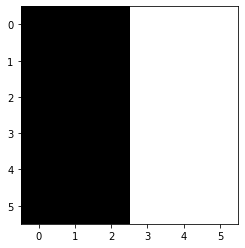

In [37]:
plt.imshow(example1, cmap="gray")

# applying sobel filter

In [53]:
def find_edges(imgFilter=None, picture=None):
    # extract row and column of input vector
    p_row, p_col=picture.shape
    k=imgFilter.shape[0]# k=3
    temp=list()# to store final result
    stride=1
    final_cols=(p_col-k)//stride + 1
    final_rows=(p_row-k)//stride + 1
    # take vertically down stride across row by row
    for v_stride in range(final_rows):
        for h_stride in range(final_cols):
            target_area_of_pic=picture[v_stride:v_stride +k, h_stride: h_stride +k]
            temp.append(sum(sum(imgFilter*target_area_of_pic)))
    print(temp)
    return np.array(temp).reshape(final_rows, final_cols)
    

In [54]:
example1

array([[  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255]])

In [55]:
sum(example1)

array([   0,    0,    0, 1530, 1530, 1530])

In [56]:
sum(sum(example1))

4590

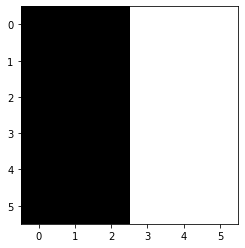

In [57]:
plt.imshow(example1, cmap="gray")

In [58]:
example1

array([[  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255]])

In [62]:
result=find_edges(sobel, example1)
result

[0, -1020, -1020, 0, 0, -1020, -1020, 0, 0, -1020, -1020, 0, 0, -1020, -1020, 0]


array([[    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0]])

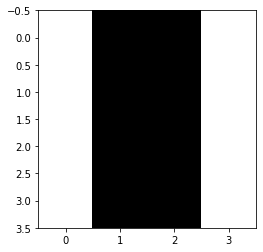

In [60]:
plt.imshow(result, cmap="gray")

In [61]:
result_T=find_edges(sobel.T, example1)
result_T

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

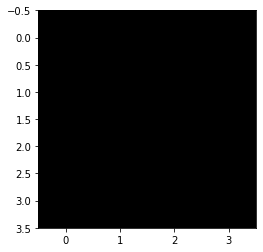

In [48]:
plt.imshow(result_T, cmap="gray")

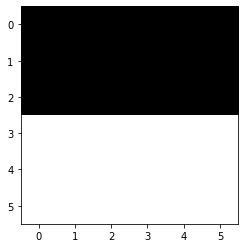

In [49]:
example_T=example1.T
plt.imshow(example_T, cmap="gray")

In [50]:
result_T=find_edges(sobel.T, example_T)
result_T

array([[    0,     0,     0,     0],
       [-1020, -1020, -1020, -1020],
       [-1020, -1020, -1020, -1020],
       [    0,     0,     0,     0]])

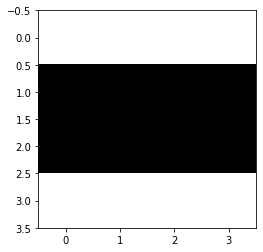

In [51]:
plt.imshow(result_T, cmap="gray")

In [52]:
result_T=find_edges(sobel, example_T)
result_T

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

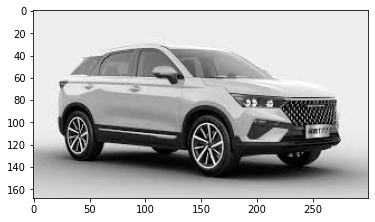

In [63]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [64]:
result_car=find_edges(sobel, car1_cv2_BGR_GRAY)
result_car

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

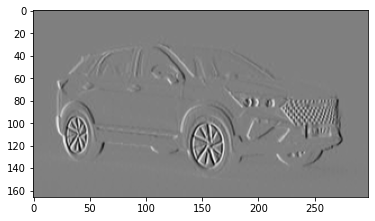

In [65]:
plt.imshow(result_car, cmap="gray")

In [66]:
result_car_T=find_edges(sobel.T,car1_cv2_BGR_GRAY)
result_car_T

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [-12, -12, -12, ..., -16, -16, -16],
       [-12, -12, -12, ..., -16, -16, -16],
       [ -4,  -4,  -4, ..., -12, -12, -12]])

In [ ]:
plt.imshow(result_car_T, cmap="gray")